# DEEP LEARNING
### Pytorch Basic

In [8]:
import torch 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
torch.cuda.is_available()
torch.cuda.current_device





<function torch.cuda.current_device() -> int>

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  
le =LabelEncoder()  
x=df.drop(columns=['Species','Id'],axis=1).values
y=le.fit_transform(df['Species'].values)

# chia du lieu voi test size=0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train).reshape(-1,1)
y_test=torch.LongTensor(y_test).reshape(-1,1)   

In [14]:
df.shape

(150, 6)

In [13]:
len(y_train)

120

In [15]:
label,counts = y_train.unique(return_counts=True)
print(label,counts)


tensor([0, 1, 2]) tensor([40, 41, 39])


# tính  đạo hàm pytorch 
# cho y =2x^4 + x^3 +3x^2 + 5x +1

In [16]:
import torch

In [18]:
x=torch.tensor(2.0,requires_grad=True   )
print(x)
print(x.grad)  


tensor(2., requires_grad=True)
None


In [19]:
y=2*x**4 + x**3+ 3*x**2+ 5*x +1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [20]:
y.grad_fn
#thuc hien phep backpropagation
y.backward()

x.grad

tensor(93.)

In [ ]:
#BTVN 
# Cho y=5x^5 + 6x^3 - 3x + 1
# cho biet do doc cua da thưc tren diem nao 
x=torch.tensor(2.0,requires_grad=True   )# cho x =2 
print(x)
print(x.grad)

function= 5*x**5 + 6*x**3 - 3*x + 1

function.grad_fn# dao ham phuong trinh y dao ham = 25x^4 + 18x^2 -3
function.backward() # thuc hien phep backpropagation
x.grad # the x= 2 vao phuong trinh dao ham y dao ham la  469


tensor(2., requires_grad=True)
None


tensor(469.)

In [ ]:
#  tạo một tensor với giá trị 2.0 và yêu cầu tính toán đạo hàm và tính građient 
# dùng lập phương  pháp gradient descent với learning rate 0.01 để  cập nhât giá trị của x  trong vòng 10 lân lặp
def grad(x):# dạo hàm y dao ham
    return 25*x**4 + 18*x**2 -3
def cost(x):# hàm mất mát
    return 5*x**5 + 6*x**3 - 3*x + 1
def myGD1(eta,x0):
    x=x0    
    for i in range(10):
        x=x - eta*cost(x)
        print(f'Vong lap thu {i+1}: x={x}')
    return x
myGD1(0.01,torch.tensor(2.0,requires_grad=True   ) )


Vong lap thu 1: x=-0.029999971389770508
Vong lap thu 2: x=-0.04089834913611412
Vong lap thu 3: x=-0.05212118849158287
Vong lap thu 4: x=-0.06367631256580353
Vong lap thu 5: x=-0.07557106018066406
Vong lap thu 6: x=-0.08781217038631439
Vong lap thu 7: x=-0.10040564835071564
Vong lap thu 8: x=-0.1133565753698349
Vong lap thu 9: x=-0.12666894495487213
Vong lap thu 10: x=-0.14034543931484222


tensor(-0.1403, grad_fn=<SubBackward0>)

BTVN 2:

Tạo một tập dữ liệu giả lập với x là số giờ học( ngẫu nhiên từ 1 - 10) và y là số điểm được tính theo công thức y = 3x + 5 + noise

Với noise là một giá trị ngẫu nhiên nhỏ

Khởi tạo tham số w và b ngẫu nhiên với requires_grad= true
tính MSE
Tính gradient

Cập nhật tham số w và b bằng gradient Descent với Learning rate alpha = 0.01
Lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình

Solution found by formula: w =  [[4.94821223 3.1590452 ]]


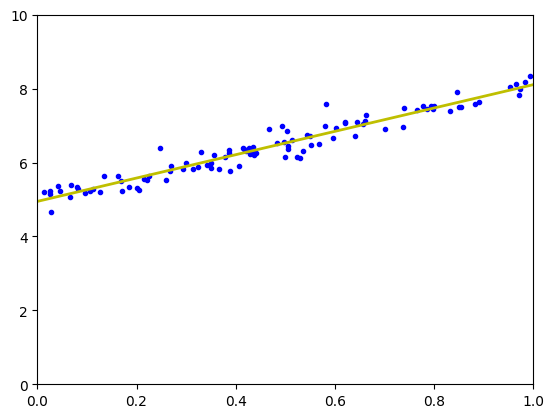

gia tri mse : 0.024604914135177295
Solution found by GD: w =  [[4.94895902 3.15751547]] ,
after 100 iterations.


In [9]:
#  tạo một tập dữ liệu giả lập với x là số giờ học (ngẫu nghiền từ 1 đến 10) và y là điểm số (y = 3 * x +5 + nhiễu)
from __future__ import division,print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt     
np.random.seed(2)

## Building Xbar
X=np.random.rand(100,1)

y = 3 * X +5 + .2*np.random.randn(100, 1)

one=np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)
A= np.dot(Xbar.T,Xbar)
b=np.dot(Xbar.T, y) 
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()


def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2

print(f"gia tri mse : {cost(w_lr)}")
# TÍNH GRADIENT 
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        w.append(w_new)  
    return (w, it)

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))


In [10]:
# code bằng pytorch
import torch
import matplotlib.pyplot as plt

torch.manual_seed(2)

# số mẫu
n = 100

# x: số giờ học (1 → 10)
x = 1 + 9 * torch.rand(n, 1)

# noise nhỏ
noise = 0.2 * torch.randn(n, 1)

# y thật
y = 3 * x + 5 + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

alpha = 0.01
epochs = 100
losses = []

for i in range(epochs):
    # forward: dự đoán
    y_pred = w * x + b

    # MSE loss
    loss = torch.mean((y - y_pred) ** 2)
    losses.append(loss.item())

    # backward: tính gradient
    loss.backward()

    # cập nhật tham số (KHÔNG tính gradient)
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # reset gradient về 0
    w.grad.zero_()
    b.grad.zero_()

    if i % 10 == 0:
        print(f"Epoch {i}: loss={loss.item():.4f}, w={w.item():.4f}, b={b.item():.4f}")

print("\nKết quả cuối:")
print("w =", w.item())
print("b =", b.item())


Epoch 0: loss=626.4906, w=2.5897, b=0.2362
Epoch 10: loss=3.2101, w=3.6934, b=0.5512
Epoch 20: loss=3.0183, w=3.6723, b=0.6878
Epoch 30: loss=2.8380, w=3.6518, b=0.8202
Epoch 40: loss=2.6686, w=3.6320, b=0.9485
Epoch 50: loss=2.5094, w=3.6127, b=1.0729
Epoch 60: loss=2.3599, w=3.5941, b=1.1934
Epoch 70: loss=2.2195, w=3.5760, b=1.3103
Epoch 80: loss=2.0875, w=3.5585, b=1.4235
Epoch 90: loss=1.9635, w=3.5415, b=1.5333

Kết quả cuối:
w = 3.526646375656128
b = 1.629217505455017


In [6]:
#pytorch tự động chuyển đổi dữ liệu từ numpy sang tensor#
#
import torch
import numpy as np

In [7]:
torch.__version__


'2.9.1+cpu'

In [15]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))
x = torch.from_numpy(arr )
print(x)
print(x.dtype)
print(type(x))



[1 2 3 4 5]
int32
<class 'numpy.ndarray'>
tensor([1, 2, 3, 4, 5], dtype=torch.int32)
torch.int32
<class 'torch.Tensor'>


In [35]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5], dtype=torch.int32)


In [36]:
print(x.dtype)

torch.int32


In [37]:
print(x.type())


torch.IntTensor


In [16]:
arr2=np.arange(0.,12.).reshape(4,3) 

arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [17]:
x2=torch.from_numpy(arr2)
print(x2)
print(x2.type()) 

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [79]:
arr = np.arange(0,5)
x = torch.from_numpy(arr)
print(x)


tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [19]:
arr[0]=99
print(x)  #tensor cũng bị thay đổi theo arr

tensor([99,  2,  3,  4,  5], dtype=torch.int32)


In [20]:
arr = np.arange(0,5)
x = torch.tensor(arr)
print(x)

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [21]:
arr[0] = 99
print(x)

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


bai tap 4 giải thích 2 trường hợp trên 
bài 5 
bạn giup thay tao tesor vơi 
empyty
zeros
ones
random
reshape vơi view voi view á 

In [2]:
import torch
# Tạo tensor Empty
t_empty = torch.empty(3, 4)
print("Empty tensor:")
print(t_empty)
print()


Empty tensor:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])



In [3]:
#Tạo tensor Zeros
t_zeros = torch.zeros(3, 4)
print("Zeros tensor:")
print(t_zeros)
print()

Zeros tensor:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])



In [4]:
#Tạo tensor Ones
t_ones = torch.ones(3, 4)
print("Ones tensor:")
print(t_ones)
print()


Ones tensor:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



In [5]:
#Tạo tensor Random
t_rand = torch.rand(3, 4)
print("Random tensor:")
print(t_rand)
print()


Random tensor:
tensor([[0.0399, 0.1899, 0.4418, 0.5064],
        [0.9797, 0.6593, 0.7283, 0.1023],
        [0.0346, 0.3078, 0.3682, 0.6546]])



In [6]:
#Reshape tensor bằng view
t = torch.arange(0, 12)
print("Tensor ban đầu:")
print(t)
print("Shape:", t.shape)
print()

t_view = t.view(3, 4)
print("Tensor sau khi view(3,4):")
print(t_view)
print("Shape:", t_view.shape)
print()


Tensor ban đầu:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Shape: torch.Size([12])

Tensor sau khi view(3,4):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Shape: torch.Size([3, 4])



In [7]:
#Reshape tensor bằng view_as
template = torch.empty(2, 6)

t_view_as = t.view_as(template)
print("Tensor sau khi view_as(template):")
print(t_view_as)
print("Shape:", t_view_as.shape)
print()


Tensor sau khi view_as(template):
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
Shape: torch.Size([2, 6])



In [8]:
#Kiểm tra chia sẻ bộ nhớ (hiểu sâu hơn)
t[0] = 999
print("Sau khi thay đổi t[0] = 999:")
print(t_view)


Sau khi thay đổi t[0] = 999:
tensor([[999,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]])
